# Feature Selection-Information gain - mutual information In Classification Problem Statements
Mutual Information
MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

Youtube Videos
Entropy: https://www.youtube.com/watch?v=1IQOtJ4NI_0

Information Gain: https://www.youtube.com/watch?v=FuTRucXB9rA

Gini Impurity: https://www.youtube.com/watch?v=5aIFgrrTqOw

Statistical test: https://www.youtube.com/watch?v=4-rxTA_5_xA

In [1]:
import pandas as pd

In [16]:
df=pd.read_csv("C:/Users/mural/Desktop/New folder/train.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# convert categ to num

In [3]:
from sklearn.preprocessing import OneHotEncoder 

In [4]:
Vehicle_Damage = pd.get_dummies(df['Vehicle_Damage'])
Gender = pd.get_dummies(df['Gender'])
Vehicle_Age = pd.get_dummies(df['Vehicle_Age'])

# drop coloumns which are converted into ohe form from main df

In [5]:
df.drop(['Vehicle_Damage', 'Vehicle_Age','Gender','id'], axis='columns', inplace=True)

In [8]:
x=pd.concat([df, Vehicle_Age,Vehicle_Damage,Gender],axis=1)
x.drop(['Response'], axis='columns', inplace=True)
x.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,1-2 Year,< 1 Year,> 2 Years,No,Yes,Female,Male
0,44,1,28.0,0,40454.0,26.0,217,0,0,1,0,1,0,1
1,76,1,3.0,0,33536.0,26.0,183,1,0,0,1,0,0,1
2,47,1,28.0,0,38294.0,26.0,27,0,0,1,0,1,0,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,0,1,0,0,1
4,29,1,41.0,1,27496.0,152.0,39,0,1,0,1,0,1,0


In [9]:
y=df.Response

In [11]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

(304887, 14)
(76222, 14)


In [12]:

from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.03151169, 0.05939336, 0.0152662 , 0.09586983, 0.00270118,
       0.05429374, 0.00114555, 0.02906437, 0.03658297, 0.00510193,
       0.09672243, 0.09079553, 0.01497567, 0.01808837])

In [13]:

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

No                      0.096722
Previously_Insured      0.095870
Yes                     0.090796
Driving_License         0.059393
Policy_Sales_Channel    0.054294
< 1 Year                0.036583
Age                     0.031512
1-2 Year                0.029064
Male                    0.018088
Region_Code             0.015266
Female                  0.014976
> 2 Years               0.005102
Annual_Premium          0.002701
Vintage                 0.001146
dtype: float64

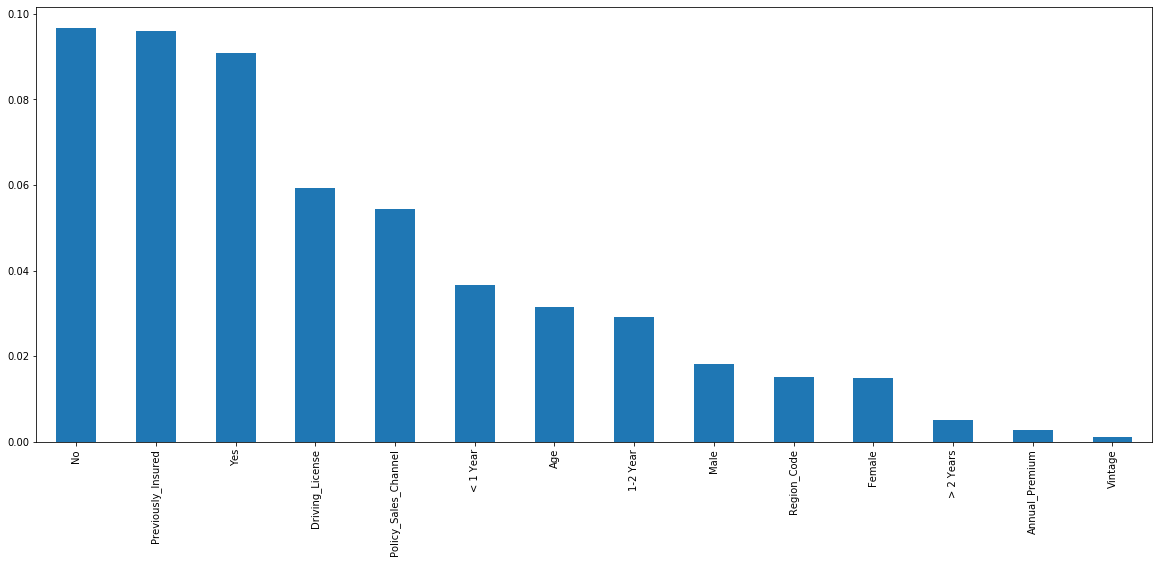

In [17]:
import matplotlib.pyplot as plt
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [15]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Driving_License', 'Previously_Insured', 'Policy_Sales_Channel', 'No',
       'Yes'],
      dtype='object')